In [19]:
import holoviews as hv
import torch
import numpy as np
import dgl
import dgl.nn as dglnn
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.nn as nn
import numpy as np
import sys
import panel as pn
pn.extension()
hv.extension('bokeh')

sys.path.append('../../..')
from pyeug import eug
sys.path.remove('../../..')

sys.path.append('../..')
from models.gat import GAT, get_embeddings
from datasets import Credit
from util import preprocess_credit, train
sys.path.remove('../..')

credit = Credit()
g, adj, features, sens, sens_names, masks, labels, feat_names = preprocess_credit(credit)

# create GAT model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
in_size = features.shape[1]
out_size = int(sum(labels.unique() != -1))
model = GAT(in_size, 8, out_size, heads=[8, 1]).to(device)

# training

In [2]:
train(g, features, labels, masks, model, save_path='demo_credit_gat.pth')

Epochs:   0%|          | 6/2000 [00:01<06:08,  5.40it/s]

Epoch 00000 | Loss 2.0407 | Val Accuracy 0.4060 | Val F1 0.4357


Epochs:   6%|▌         | 110/2000 [00:03<00:42, 44.45it/s]

Epoch 00100 | Loss 0.6736 | Val Accuracy 0.7035 | Val F1 0.7212


Epochs:  10%|█         | 205/2000 [00:05<00:40, 44.08it/s]

Epoch 00200 | Loss 0.6729 | Val Accuracy 0.7061 | Val F1 0.7233


Epochs:  16%|█▌        | 310/2000 [00:08<00:37, 45.05it/s]

Epoch 00300 | Loss 0.6644 | Val Accuracy 0.7105 | Val F1 0.7264


Epochs:  20%|██        | 405/2000 [00:10<00:35, 44.61it/s]

Epoch 00400 | Loss 0.6615 | Val Accuracy 0.7084 | Val F1 0.7249


Epochs:  26%|██▌       | 510/2000 [00:12<00:33, 44.64it/s]

Epoch 00500 | Loss 0.6672 | Val Accuracy 0.7087 | Val F1 0.7251


Epochs:  30%|███       | 605/2000 [00:14<00:31, 44.45it/s]

Epoch 00600 | Loss 0.6708 | Val Accuracy 0.7087 | Val F1 0.7251


Epochs:  36%|███▌      | 710/2000 [00:17<00:28, 44.69it/s]

Epoch 00700 | Loss 0.6674 | Val Accuracy 0.7087 | Val F1 0.7251


Epochs:  40%|████      | 810/2000 [00:19<00:26, 44.93it/s]

Epoch 00800 | Loss 0.6696 | Val Accuracy 0.7087 | Val F1 0.7251


Epochs:  46%|████▌     | 910/2000 [00:21<00:24, 44.71it/s]

Epoch 00900 | Loss 0.6682 | Val Accuracy 0.7087 | Val F1 0.7251


Epochs:  50%|█████     | 1010/2000 [00:24<00:22, 44.84it/s]

Epoch 01000 | Loss 0.6669 | Val Accuracy 0.7087 | Val F1 0.7251


Epochs:  55%|█████▌    | 1105/2000 [00:26<00:20, 43.99it/s]

Epoch 01100 | Loss 0.6679 | Val Accuracy 0.7087 | Val F1 0.7251


Epochs:  60%|██████    | 1210/2000 [00:28<00:17, 44.94it/s]

Epoch 01200 | Loss 0.6637 | Val Accuracy 0.7087 | Val F1 0.7251


Epochs:  66%|██████▌   | 1310/2000 [00:30<00:15, 44.88it/s]

Epoch 01300 | Loss 0.6712 | Val Accuracy 0.7087 | Val F1 0.7251


Epochs:  70%|███████   | 1405/2000 [00:32<00:13, 44.54it/s]

Epoch 01400 | Loss 0.6687 | Val Accuracy 0.7087 | Val F1 0.7251


Epochs:  75%|███████▌  | 1505/2000 [00:35<00:11, 43.94it/s]

Epoch 01500 | Loss 0.6680 | Val Accuracy 0.7087 | Val F1 0.7251


Epochs:  76%|███████▌  | 1511/2000 [00:35<00:11, 42.86it/s]

Early stopping triggered.


In [20]:
# load the model
model.load_state_dict(torch.load('demo_credit_gat.pth'))
model.eval()

GAT(
  (gat_layers): ModuleList(
    (0): GATConv(
      (fc): Linear(in_features=12, out_features=64, bias=False)
      (feat_drop): Dropout(p=0.6, inplace=False)
      (attn_drop): Dropout(p=0.6, inplace=False)
      (leaky_relu): LeakyReLU(negative_slope=0.2)
    )
    (1): GATConv(
      (fc): Linear(in_features=64, out_features=2, bias=False)
      (feat_drop): Dropout(p=0.6, inplace=False)
      (attn_drop): Dropout(p=0.6, inplace=False)
      (leaky_relu): LeakyReLU(negative_slope=0.2)
    )
  )
  (mlp): Linear(in_features=2, out_features=2, bias=True)
)

# fairness analysis

In [3]:
e = eug.EUG(model, adj, features, sens, sens_names, masks, labels, get_embeddings, feat_names=feat_names)
app = e.show()
server = pn.serve(app, port=45788)

/home/newdisk/xinwu/anaconda3/envs/holoviews_clone/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/newdisk/xinwu/anaconda3/envs/holoviews_clone/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
100%|██████████| 12/12 [00:02<00:00,  4.23it/s]


tensor([1.0000, 0.2182, 0.1925,  ..., 0.1361, 0.0870, 1.0000], device='cuda:0')
nnz 274754


100%|██████████| 57/57 [00:00<00:00, 133.88it/s]


Launching server at http://localhost:45788


100%|██████████| 12/12 [00:02<00:00,  4.24it/s]


In [4]:
server.stop()

# check attention weight distribution

In [3]:
with torch.no_grad():
    model(g, features)

In [25]:
attn_weights = model.attn_weights

In [38]:
groups = sens[0]
unique_groups = np.unique(groups)
n_unique_groups = unique_groups.size

# original adj

In [45]:
group_sums = torch.zeros((n_unique_groups, adj.shape[1])).to(device)
# Iterate over each group, summing the corresponding rows
for i, group in enumerate(unique_groups):
    group_mask = torch.tensor(groups == group)  # Boolean array where True indicates the index belongs to group i
    group_indices = torch.nonzero(group_mask).squeeze(-1).to(torch.long).to(device)  # Get the indices of the group
    group_adj = torch.index_select(adj.to(device), 0, group_indices)
    group_sums[i] = group_adj.sum(dim=0).to_dense()

group_connection_matrix = torch.zeros((n_unique_groups, n_unique_groups)).to(device)
# Iterate over each group to perform the extraction and summation of corresponding columns
for i, group in enumerate(unique_groups):
    group_mask = torch.tensor(groups == group)  # Boolean array where True indicates the index belongs to group i
    group_indices = torch.nonzero(group_mask).squeeze(-1).to(torch.long).to(device)  # Get the indices of the group
    group_group_sums = torch.index_select(group_sums, 1, group_indices)
    sum_group_group_sums = group_group_sums.sum(dim=1).to_dense()
    group_connection_matrix[i] = sum_group_group_sums
group_connection_matrix

tensor([[265679.,  16627.],
        [ 16627.,   5821.]], device='cuda:0')

# layer 0 weight matrix

In [52]:
import torch

# Given adjacency matrix and attention weights
adj_indices = adj.coalesce().indices().to(device)  # Get the indices from the adjacency matrix
attn_weights0 = attn_weights[0].sum(dim=(1, 2)).view(-1).to(device)  # Flatten the attention weights

# Create a new sparse matrix with attention weights as values
attn_matrix = torch.sparse_coo_tensor(indices=adj_indices, values=attn_weights0, size=adj.size())

# Check the new sparse matrix
print(attn_matrix)

tensor(indices=tensor([[    0,     0,     0,  ..., 29999, 29999, 29999],
                       [    0,  9950, 23310,  ..., 16532, 24531, 29999]]),
       values=tensor([1.9818, 0.9682, 0.1805,  ..., 0.4484, 1.3613, 1.1582]),
       device='cuda:0', size=(30000, 30000), nnz=304754, layout=torch.sparse_coo)


In [53]:
group_sums = torch.zeros((n_unique_groups, adj.shape[1])).to(device)
# Iterate over each group, summing the corresponding rows
for i, group in enumerate(unique_groups):
    group_mask = torch.tensor(groups == group)  # Boolean array where True indicates the index belongs to group i
    group_indices = torch.nonzero(group_mask).squeeze(-1).to(torch.long).to(device)  # Get the indices of the group
    group_adj = torch.index_select(attn_matrix, 0, group_indices)
    group_sums[i] = group_adj.sum(dim=0).to_dense()

group_connection_matrix = torch.zeros((n_unique_groups, n_unique_groups)).to(device)
# Iterate over each group to perform the extraction and summation of corresponding columns
for i, group in enumerate(unique_groups):
    group_mask = torch.tensor(groups == group)  # Boolean array where True indicates the index belongs to group i
    group_indices = torch.nonzero(group_mask).squeeze(-1).to(torch.long).to(device)  # Get the indices of the group
    group_group_sums = torch.index_select(group_sums, 1, group_indices)
    sum_group_group_sums = group_group_sums.sum(dim=1).to_dense()
    group_connection_matrix[i] = sum_group_group_sums
group_connection_matrix

tensor([[203458.1250,  15061.8770],
        [ 15120.4746,   6359.5244]], device='cuda:0')

# layer 1 weight matrix (794.5184/1894.3873>5821/16627, homophily severe)

In [ ]:
import torch

# Given adjacency matrix and attention weights
adj_indices = adj.coalesce().indices().to(device)  # Get the indices from the adjacency matrix
attn_weights1 = attn_weights[1].view(-1).to(device)  # Flatten the attention weights

# Create a new sparse matrix with attention weights as values
attn_matrix = torch.sparse_coo_tensor(indices=adj_indices, values=attn_weights1, size=adj.size())

# Check the new sparse matrix
print(attn_matrix)


tensor(indices=tensor([[    0,     0,     0,  ..., 29999, 29999, 29999],
                       [    0,  9950, 23310,  ..., 16532, 24531, 29999]]),
       values=tensor([0.2426, 0.1182, 0.0214,  ..., 0.0556, 0.1660, 0.1419]),
       device='cuda:0', size=(30000, 30000), nnz=304754, layout=torch.sparse_coo)


In [44]:
group_sums = torch.zeros((n_unique_groups, adj.shape[1])).to(device)
# Iterate over each group, summing the corresponding rows
for i, group in enumerate(unique_groups):
    group_mask = torch.tensor(groups == group)  # Boolean array where True indicates the index belongs to group i
    group_indices = torch.nonzero(group_mask).squeeze(-1).to(torch.long).to(device)  # Get the indices of the group
    group_adj = torch.index_select(attn_matrix, 0, group_indices)
    group_sums[i] = group_adj.sum(dim=0).to_dense()

group_connection_matrix = torch.zeros((n_unique_groups, n_unique_groups)).to(device)
# Iterate over each group to perform the extraction and summation of corresponding columns
for i, group in enumerate(unique_groups):
    group_mask = torch.tensor(groups == group)  # Boolean array where True indicates the index belongs to group i
    group_indices = torch.nonzero(group_mask).squeeze(-1).to(torch.long).to(device)  # Get the indices of the group
    group_group_sums = torch.index_select(group_sums, 1, group_indices)
    sum_group_group_sums = group_group_sums.sum(dim=1).to_dense()
    group_connection_matrix[i] = sum_group_group_sums
group_connection_matrix

tensor([[25420.6133,  1894.3873],
        [ 1890.4816,   794.5184]], device='cuda:0')

# compare fairness metric values

In [21]:
sys.path.append('../..')
from models.gcn import GCN
sys.path.remove('../..')

model_gcn = GCN(in_size, 16, out_size).to(device)

# load the model
model_gcn.load_state_dict(torch.load('../gcn/demo_credit_gcn.pth'))
model_gcn.eval()

GCN(
  (layers): ModuleList(
    (0): GraphConv(in=12, out=16, normalization=both, activation=<function relu at 0x7f48dd08d3a0>)
    (1): GraphConv(in=16, out=16, normalization=both, activation=None)
  )
  (mlp): Linear(in_features=16, out_features=2, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [22]:
sys.path.append('../../..')
from pyeug.metrics import node_classification
from pyeug.util import concatenate_elements
sys.path.remove('../../..')

vectorized_concat = np.vectorize(concatenate_elements)
# Apply the vectorized function across columns
sens_current = vectorized_concat(*sens)

# gcn
with torch.no_grad():
    logits = model_gcn(g, features)
predictions = torch.argmax(logits, dim=1).cpu().numpy()
labels_np = labels.cpu().numpy()
labeled_mask = labels_np != -1
labeled_predictions = predictions[labeled_mask]
labeled_labels = labels_np[labeled_mask]
labeled_sens = sens_current[labeled_mask]
gcn_metrics = [
    node_classification.delta_std_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_sp(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_sp(labeled_predictions, labeled_labels, labeled_sens),
]
print('gcn metrics:', gcn_metrics)

# sage
with torch.no_grad():
    logits = model(g, features)
predictions = torch.argmax(logits, dim=1).cpu().numpy()
labels_np = labels.cpu().numpy()
labeled_mask = labels_np != -1
labeled_predictions = predictions[labeled_mask]
labeled_labels = labels_np[labeled_mask]
labeled_sens = sens_current[labeled_mask]
gat_metrics = [
    node_classification.delta_std_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_sp(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_sp(labeled_predictions, labeled_labels, labeled_sens),
]
print('gat metrics:', gat_metrics)

gcn metrics: [0.043859299277925534, 0.043859299277925534, 0.0020798538177058427, 0.004159707635411685, 0.004159707635411694, 0.004159707635411694, 0.005901151167273612, 0.005901151167273612]
gat metrics: [0.04384886851822878, 0.04384886851822878, 0.03078867265887527, 0.06157734531775054, 0.061577345317750554, 0.061577345317750554, 0.06435533303268204, 0.06435533303268204]


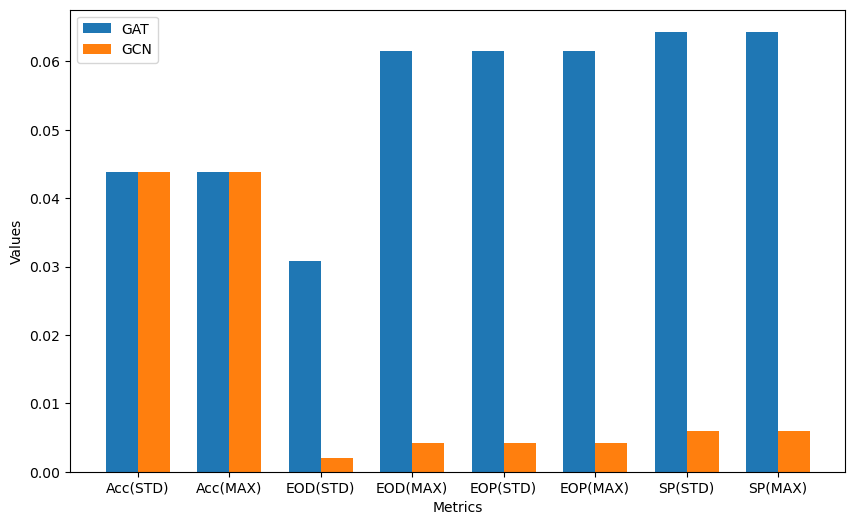

In [14]:
import matplotlib.pyplot as plt

# Labels for the metrics
labels = ['Acc(STD)', 'Acc(MAX)', 'EOD(STD)', 'EOD(MAX)', 'EOP(STD)', 'EOP(MAX)', 'SP(STD)', 'SP(MAX)']

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(labels))

bar1 = ax.bar(index, gat_metrics, bar_width, label='GAT')
bar2 = ax.bar([p + bar_width for p in index], gcn_metrics, bar_width, label='GCN')

# Adding labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
# ax.set_title('Comparison of GCN and GraphSAGE Metrics')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
# plt.xticks(rotation=45)
plt.show()

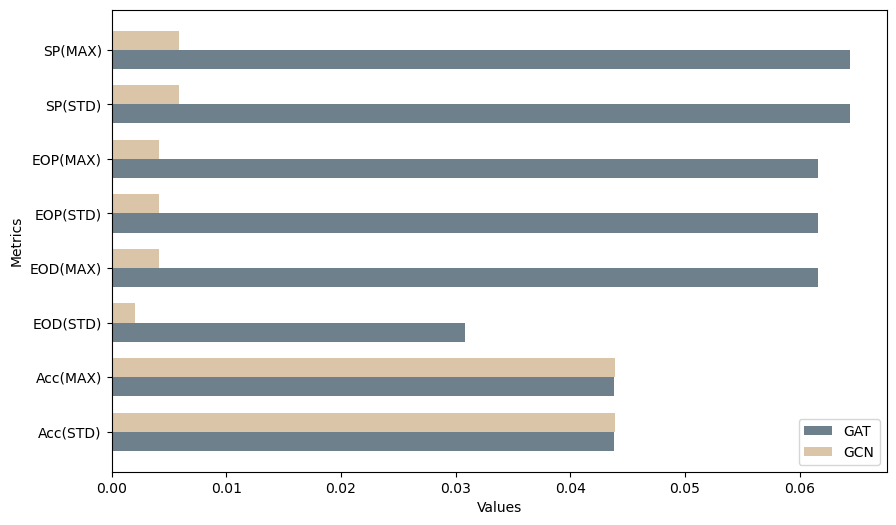

In [5]:
import matplotlib.pyplot as plt


# Labels for the metrics
labels = ['Acc(STD)', 'Acc(MAX)', 'EOD(STD)', 'EOD(MAX)', 'EOP(STD)', 'EOP(MAX)', 'SP(STD)', 'SP(MAX)']

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(labels))

bar1 = ax.barh(index, gat_metrics, bar_width, label='GAT', color='#6E808C')
bar2 = ax.barh([p + bar_width for p in index], gcn_metrics, bar_width, label='GCN', color='#DAC5A9')

# Adding labels, title, and legend
ax.set_ylabel('Fairness Metrics')
ax.set_xlabel('Values')
# ax.set_title('Comparison of GCN and GraphSAGE Metrics')
ax.set_yticks([p + bar_width / 2 for p in index])
ax.set_yticklabels(labels)
ax.legend()

# Show the plot
plt.show()


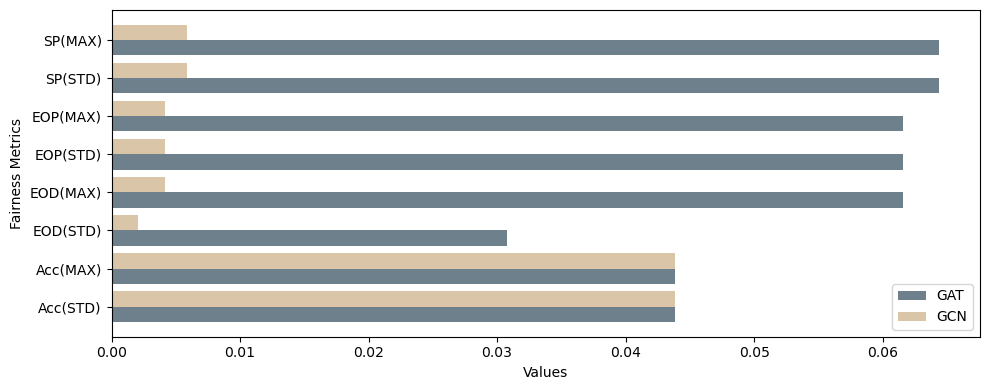

In [15]:
import matplotlib.pyplot as plt


# Labels for the metrics
labels = ['Acc(STD)', 'Acc(MAX)', 'EOD(STD)', 'EOD(MAX)', 'EOP(STD)', 'EOP(MAX)', 'SP(STD)', 'SP(MAX)']

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 4))  # Adjusted figure height for more compactness
bar_width = 0.05
index = range(len(labels))
index = list(map(lambda x: x / 8, index))  # Double the index to create space between the bars

bar1 = ax.barh(index, gat_metrics, bar_width, label='GAT', color='#6E808C')
bar2 = ax.barh([p + bar_width for p in index], gcn_metrics, bar_width, label='GCN', color='#DAC5A9')

# Adding labels, title, and legend
ax.set_ylabel('Fairness Metrics')
ax.set_xlabel('Values')
# ax.set_title('Comparison of GCN and GraphSAGE Metrics')
ax.set_yticks([p + bar_width / 2 for p in index])
ax.set_yticklabels(labels)
ax.legend()

# Adjust the layout to be more compact
plt.tight_layout()

# Show the plot
plt.show()


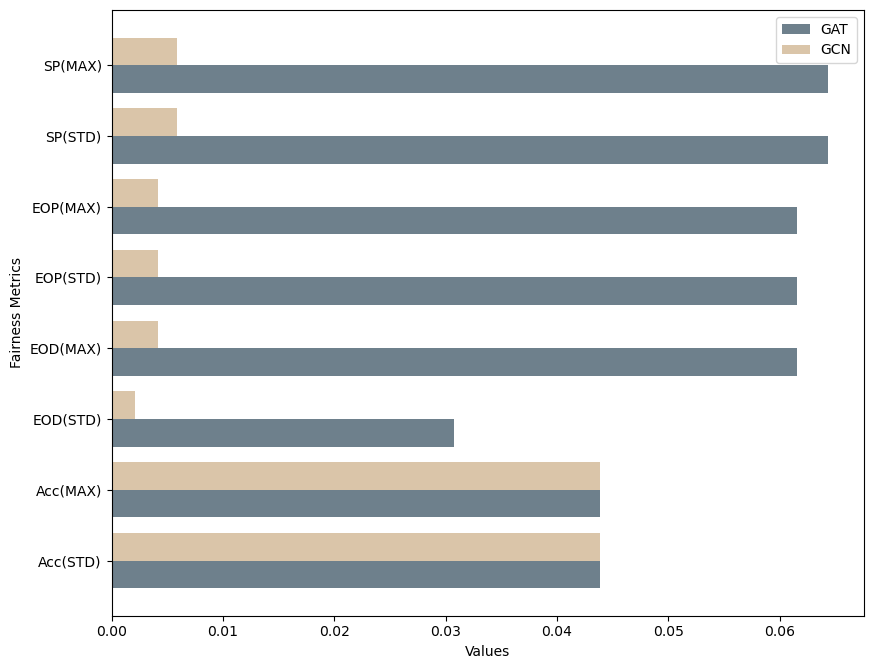

In [34]:
import matplotlib.pyplot as plt


# Labels for the metrics
labels = ['Acc(STD)', 'Acc(MAX)', 'EOD(STD)', 'EOD(MAX)', 'EOP(STD)', 'EOP(MAX)', 'SP(STD)', 'SP(MAX)']

# Creating the plot
fig, ax = plt.subplots(figsize=(8.84, 6.79))  # Adjusted figure height for more compactness
bar_width = 0.13  # Reduced bar width
bar_spacing = 0.0  # Spacing between bars
index = range(len(labels))
index = list(map(lambda x: x / 3, index))  # Double the index to create space between the bars

bar1 = ax.barh(index, gat_metrics, bar_width, label='GAT', color='#6E808C')
bar2 = ax.barh([p + bar_width + bar_spacing for p in index], gcn_metrics, bar_width, label='GCN', color='#DAC5A9')

# Adding labels, title, and legend
ax.set_ylabel('Fairness Metrics')
ax.set_xlabel('Values')
# ax.set_title('Comparison of GCN and GraphSAGE Metrics')
ax.set_yticks([p + (bar_width + bar_spacing) / 2 for p in index])
ax.set_yticklabels(labels)
# ax.set_yticklabels(labels, fontsize=18)  # Increased font size
ax.legend()

# Adjust the layout to be more compact
plt.tight_layout()

# Show the plot
plt.show()
